In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import math

from skimage import color
from skimage import io
from skimage import morphology as skim
from skimage.measure import label, regionprops 


In [3]:
pic_arr = [imread(f'pic.{i}.jpg') for i in range(1, 6, 1)]
pic_arr = [*pic_arr, *[imread(f'pic.6{litter}.tif') for i, litter in zip(range(2), ('a', 'b'))]] 
pic_arr = [*pic_arr, *[imread(f'pic.{i}.png') for i in range(7, 11, 1)]] 
pic_arr.append(imread('rice.png'))

In [4]:
pic_arr = [imread(f'pic.{i}.jpg') for i in range(1, 6, 1)]
pic_arr = [*pic_arr, *[imread(f'pic.6{litter}.tif') for i, litter in zip(range(2), ('a', 'b'))]] 
pic_arr = [*pic_arr, *[imread(f'pic.{i}.png') for i in range(7, 11, 1)]] 
pic_arr.append(imread('rice.png'))

(444, 508)


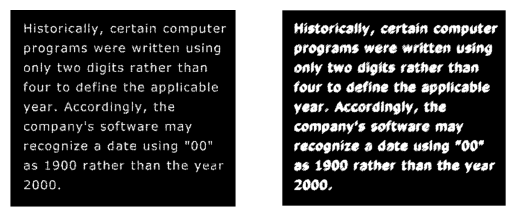

In [5]:
img1 = pic_arr[0]

print(img1.shape)

struc = np.zeros((5,5))

for ind_i, i in enumerate(struc):
    len(struc) - ind_i - 1
    for ind_j, j in enumerate(i):
        if ind_j == len(struc) - ind_i - 1:
            struc[ind_i][ind_j] = 1

threshold = 120

img1 = 1.0 * (img1 >= threshold)

img1_dilation = ndimage.binary_dilation(img1, structure=struc)

fig, (ax1, ax2) = plt.subplots(1, 2)

for axe in fig.get_axes():
    axe.axis('off')


ax1.imshow(img1, cmap='gray')
ax2.imshow(img1_dilation, cmap='gray')

plt.show()




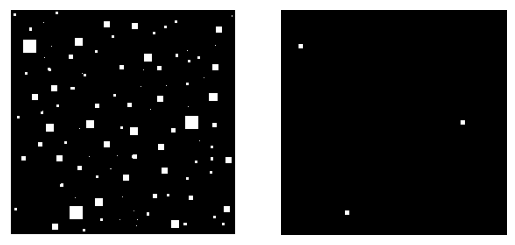

In [6]:
img2 = pic_arr[1]

threshold = 120
img2 = 1.0 * (img2 >= threshold)

img2 = color.rgb2gray(img2)

img2_erosion = ndimage.binary_erosion(input=img2, structure=np.ones((11,11)))

fig, (ax3, ax4) = plt.subplots(1, 2)

for axe in fig.get_axes():
    axe.axis('off')

ax3.imshow(img2, cmap='gray')
ax4.imshow(img2_erosion, cmap='gray')

plt.show()

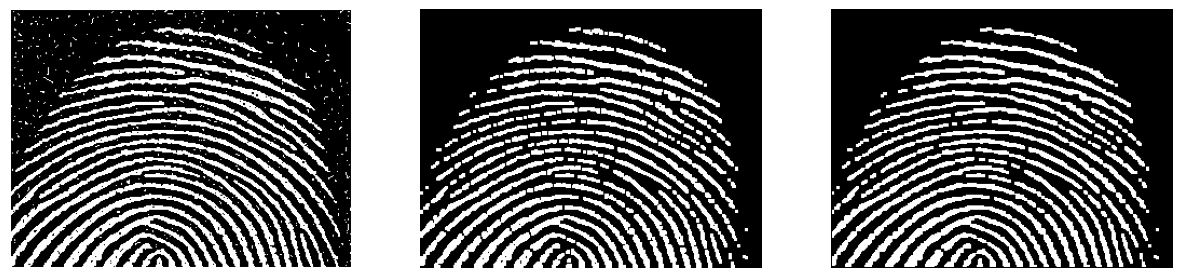

In [7]:
img3 = pic_arr[2]

threshold = 120
img3 = 1.0 * (img3 >= threshold)
img3 = color.rgb2gray(img3)

img3_opening = np.copy(img3)
img3_closing = np.copy(img3)

img3_opening = ndimage.binary_opening(img3_opening, np.ones(shape=(3,3)))
img3_closing = ndimage.binary_closing(img3_opening, np.ones(shape=(3,3)))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for axe in fig.get_axes():
    axe.axis('off')

fig.set_figheight(15)
fig.set_figwidth(15)    

ax1.imshow(img3, cmap='gray')
ax2.imshow(img3_opening, cmap='gray')
ax3.imshow(img3_closing, cmap='gray')

plt.show()


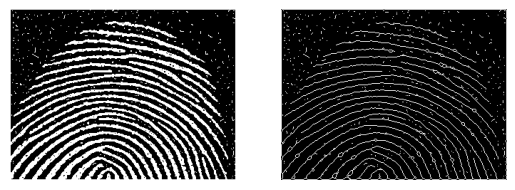

In [8]:
img3_thin = np.copy(img3)

img3_thin = skim.thin(img3_thin)

fig, (ax1, ax2) = plt.subplots(1, 2)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img3, cmap='gray')
ax2.imshow(img3_thin, cmap='gray')

plt.show()

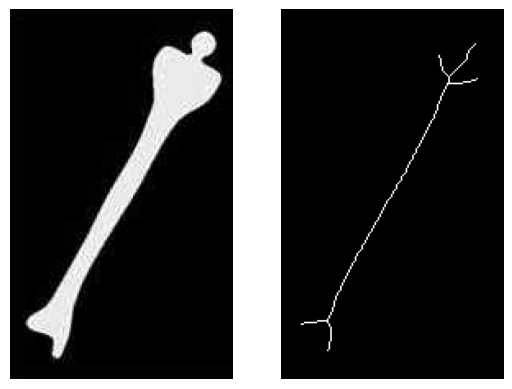

In [9]:
img4 = pic_arr[3]

threshold = 120
img4_skel = 1.0 * (img4 >= threshold)
img4_skel = color.rgb2gray(img4_skel)

img4_skel = skim.skeletonize(img4_skel)
fig, (ax1, ax2) = plt.subplots(1, 2)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img4, cmap='gray')
ax2.imshow(img4_skel, cmap='gray')

plt.show()

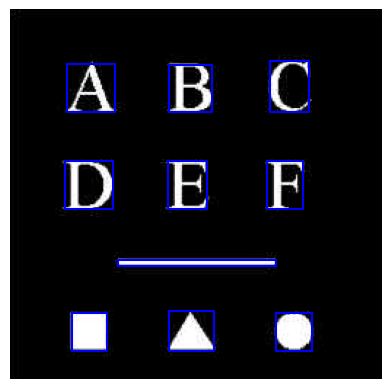

In [10]:
img5 = pic_arr[4]

threshold = 120
img5_labels = 1.0 * (img5 >= threshold)
img5_labels = color.rgb2gray(img5_labels)

labels = label(img5_labels)

regions = regionprops(labels)

fig, ax = plt.subplots()
plt.axis('off')

for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=1.5)

plt.imshow(img5)
plt.show()


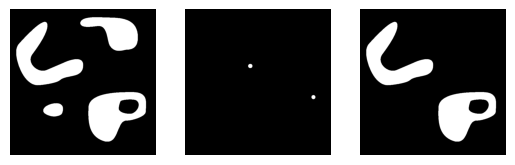

In [11]:
img6 = pic_arr[5]
img7 = pic_arr[6]

threshold = 150

img6 = 1 * (img6 >= threshold)
img7 = 1 * (img7 >= threshold)

reconstruct = skim.reconstruction(seed=img7, mask=img6, method='dilation')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img6, cmap='gray')
ax2.imshow(img7, cmap='gray')
ax3.imshow(reconstruct, cmap='gray')

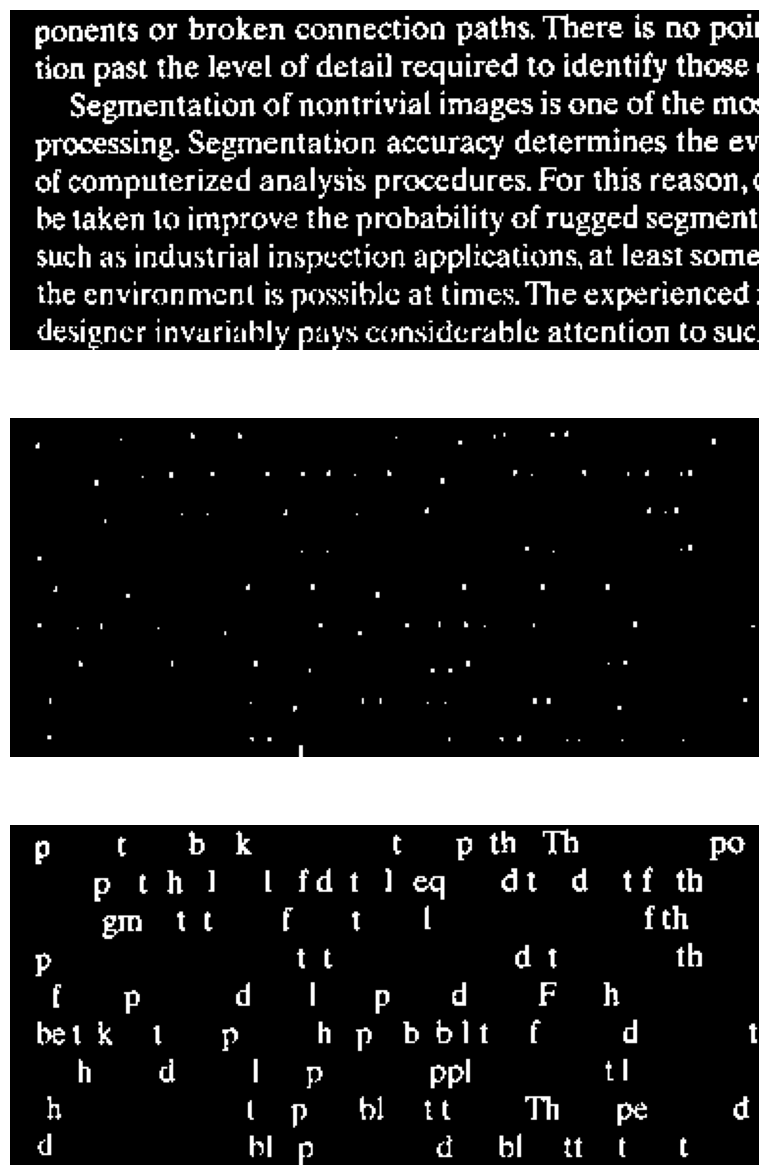

<Figure size 2000x2000 with 0 Axes>

In [12]:
img8 = pic_arr[7]

img8 = color.rgb2gray(color.rgba2rgb(img8))

threshold = 0.3
img8 = 1 * (img8 >= threshold)

erosion_img8 = skim.binary_erosion(img8, np.ones((10,1)))

reconstruct = skim.reconstruction(seed=erosion_img8, mask=img8, method='dilation')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

plt.figure(figsize=(20,20))

for axe in fig.get_axes():
    axe.axis('off')

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.imshow(img8, cmap='gray')
ax2.imshow(erosion_img8, cmap='gray')
ax3.imshow(reconstruct, cmap='gray')

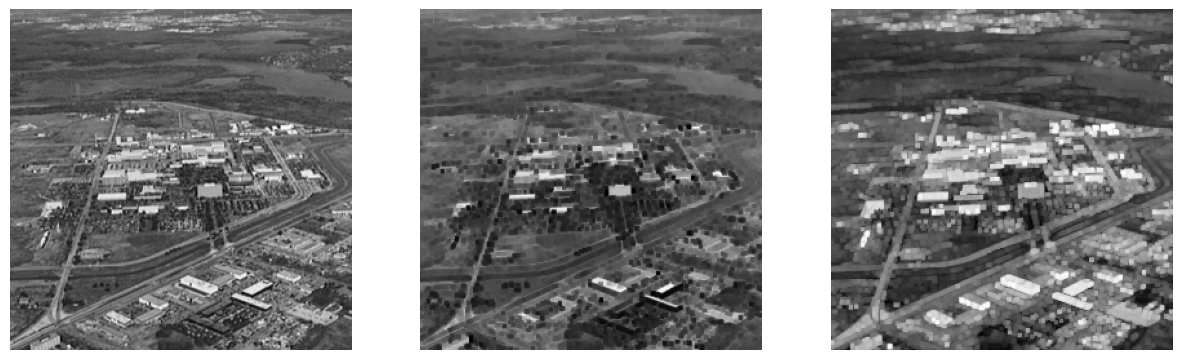

In [13]:
img9_dilation = pic_arr[8]
img9_old = np.copy(img9_dilation)

img9_dilation = color.rgb2gray(color.rgba2rgb(img9_dilation))

img9_erosion = np.copy(img9_dilation)

img9_erosion = skim.erosion(img9_erosion, np.ones((3,3)))
img9_dilation = skim.dilation(img9_dilation, np.ones((3,3)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img9_old, cmap='gray')
ax2.imshow(img9_erosion, cmap='gray')
ax3.imshow(img9_dilation, cmap='gray')


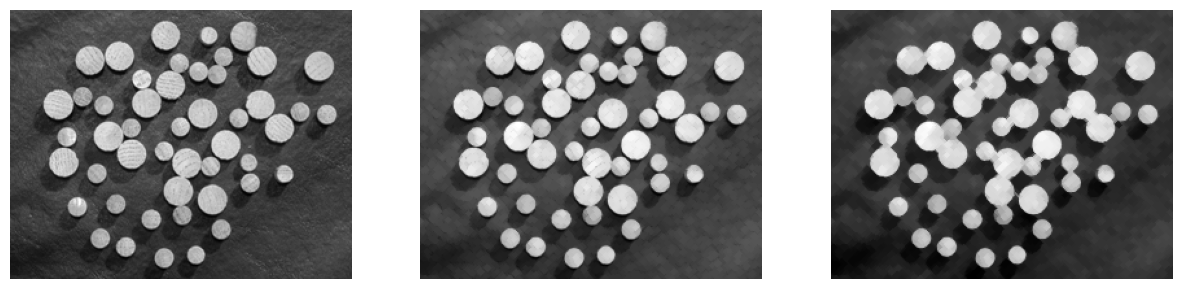

In [14]:
img10old = pic_arr[9]

img10old = color.rgb2gray(color.rgba2rgb(img10old))

# threshold = 0.25
# img10old = 1 * (img10old >= threshold)

img10_opening = np.copy(img10old)
img10_closing = np.copy(img10old)


img10_opening = skim.opening(img10_opening, skim.disk(2))
img10_closing = skim.closing(img10_opening, skim.disk(2))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img10old, cmap='gray')
ax2.imshow(img10_opening, cmap='gray')
ax3.imshow(img10_closing, cmap='gray')

plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


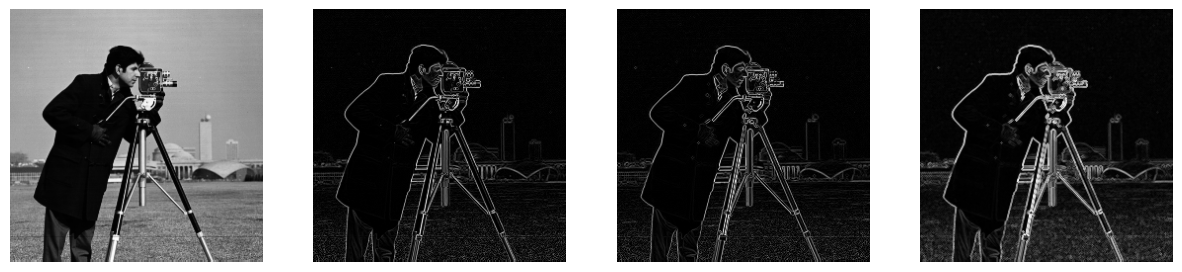

In [15]:
img11old = plt.imread('cameraman.tif')

footprint = skim.diamond(1)

print(footprint)

g_i = img11old - skim.erosion(img11old, footprint)
g_e = skim.dilation(img11old, footprint) - img11old

g = g_i + g_e

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img11old, cmap='gray')
ax2.imshow(g_i, cmap='gray')
ax3.imshow(g_e, cmap='gray')
ax4.imshow(g, cmap='gray')

plt.show()

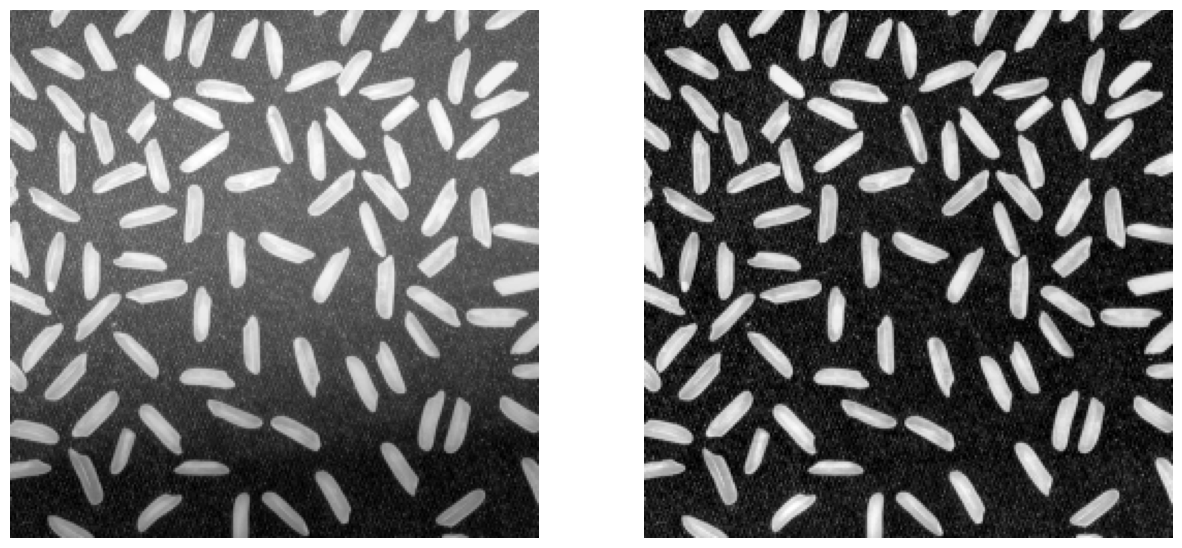

In [16]:
img12old = plt.imread('rice.png')

foot = skim.disk(40)

f = img12old - skim.opening(img12old, footprint=foot)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(img12old, cmap='gray')
ax2.imshow(f, cmap='gray')

plt.show()

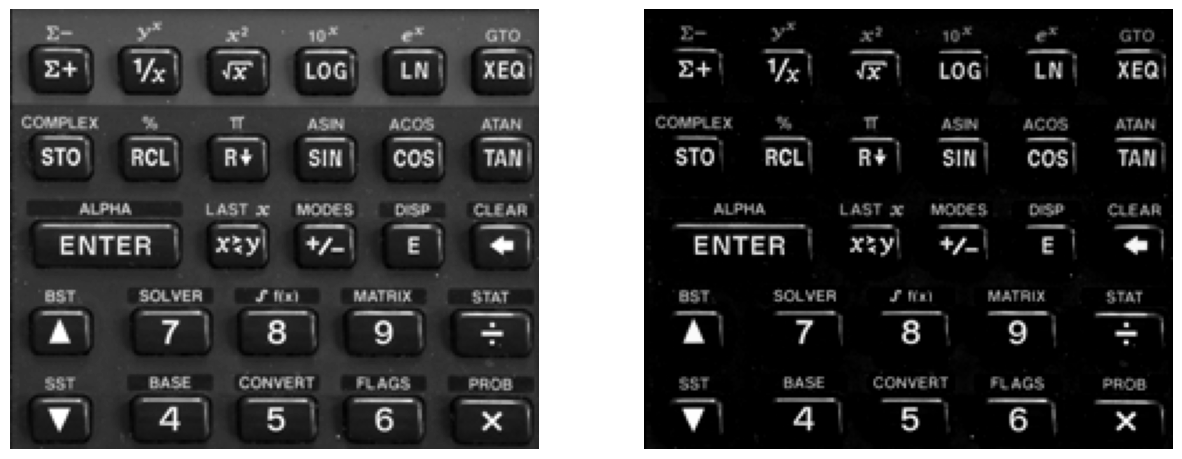

In [17]:
f = plt.imread('pic.10.png')

f = color.rgb2gray(color.rgba2rgb(f))

b = np.ones((1, 71))
er = skim.erosion(f, b)
f_r = skim.reconstruction(seed=er, mask=f)
f_thr = f - f_r

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(f, cmap='gray')
ax2.imshow(f_thr, cmap='gray')